# Importing libraries


In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
! pip install yfinance
import yfinance as yf
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing file

In [ ]:
plt.style.use('fivethirtyeight')

df = yf.pdr_override()
stock = 'aapl'  # input("Enter a stock symbol: ")
# print(stock)

df = yf.download(tickers=stock, period='5y', interval='1d')
print('\n')
print(df.head(10))
print('\n')
print('Shape of original dataframe:', df.shape)
print('\n')
# print(df.head())
print(df.info())
print('\n')
print('NaN values present:', df.isnull().values.any())
# df.reset_index('Date', inplace=True)
# sns.lineplot(data=df, x='Date', y='Close')
plt.show()

[*********************100%***********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-07-27  38.437500  38.497501  36.825001  37.639999  35.632507  129905200
2017-07-28  37.472500  37.557499  37.297501  37.375000  35.381649   68854800
2017-07-31  37.474998  37.582500  37.032501  37.182499  35.199406   79383600
2017-08-01  37.275002  37.555000  37.102501  37.512501  35.511814  141474400
2017-08-02  39.820000  39.937500  39.040001  39.285000  37.189774  279747200
2017-08-03  39.262501  39.302502  38.755001  38.892502  36.818214  108389200
2017-08-04  39.017502  39.349998  38.922501  39.097500  37.012272   82239600
2017-08-07  39.264999  39.730000  39.167500  39.702499  37.585007   87481200
2017-08-08  39.650002  40.457500  39.567501  40.020000  37.885578  144823600
2017-08-09  39.814999  40.317501  39.777500  40.264999  38.117512  104526000


Sha

# Creating a dataframe

In [ ]:
new_df = df[['Close', 'Open', 'High', 'Low', 'Adj Close', 'Volume']]

# data = df.filter(['Close', 'Open', 'High'])
print('Required dataset:\n', new_df.head())
print('\n')
x = new_df.iloc[:, 1:].values
y = new_df.iloc[:, 0:1].values

print('Independent Variables:\n',x.shape)
print('\n')
print('Dependent Variable\n', y.shape)
# training data length
training_data_len = math.ceil(len(x) * .8)
print('Length Of training dataset', training_data_len)

Required dataset:
                 Close       Open       High        Low  Adj Close     Volume
Date                                                                        
2017-07-27  37.639999  38.437500  38.497501  36.825001  35.632507  129905200
2017-07-28  37.375000  37.472500  37.557499  37.297501  35.381649   68854800
2017-07-31  37.182499  37.474998  37.582500  37.032501  35.199406   79383600
2017-08-01  37.512501  37.275002  37.555000  37.102501  35.511814  141474400
2017-08-02  39.285000  39.820000  39.937500  39.040001  37.189774  279747200


Independent Variables:
 (1259, 5)


Dependent Variable
 (1259, 1)
Length Of training dataset 1008


# Percentage Change

Percentage Change for closing prices of the stocks:
         Close
0          NaN
1    -0.126643
2    -0.105336
3     0.201836
4     0.902035
...        ...
1254  0.019661
1255 -0.010517
1256 -0.009617
1257 -0.011499
1258  0.023739

[1259 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


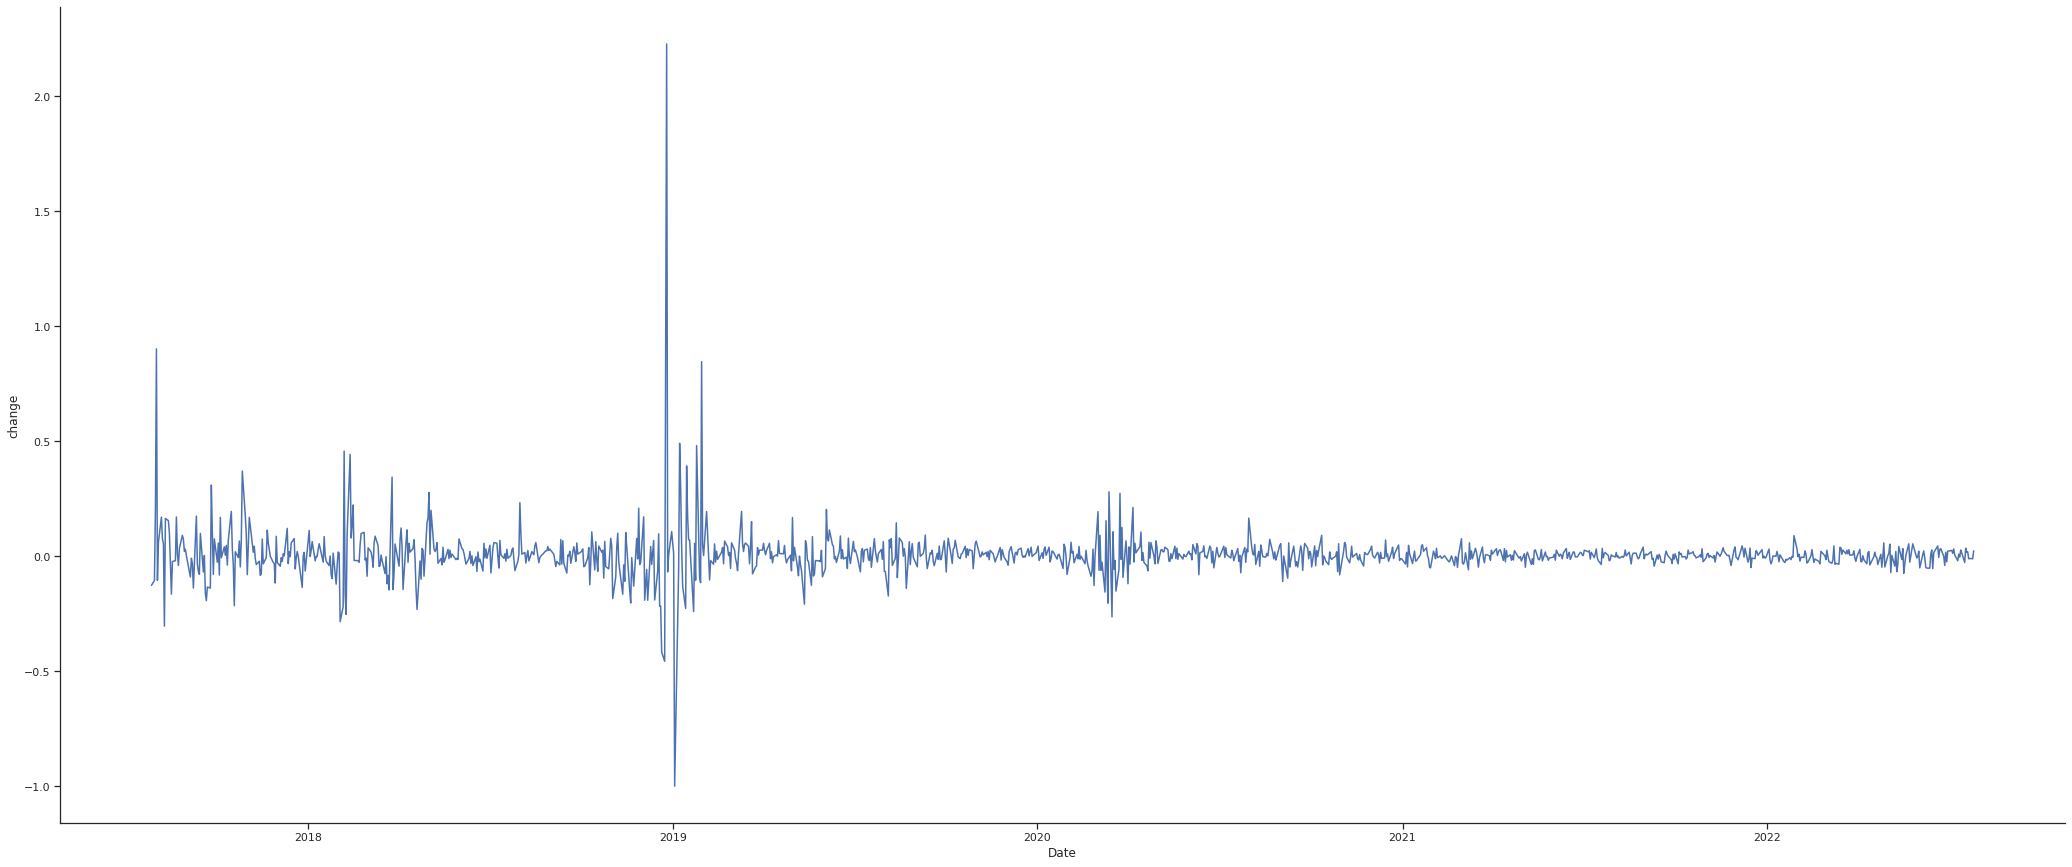

In [ ]:
eodPrices   = pd.DataFrame(data=df_scalednew['Close'])
percentageChange = eodPrices.pct_change();

print("Percentage Change for closing prices of the stocks:")

print(percentageChange)

df_scalednew['change']=percentageChange

# adding custom params
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
import seaborn as sns

sns.set_theme(style="ticks", rc=custom_params)
fig, axes = plt.subplots(figsize=(32, 14))

sns.lineplot(data=df_scalednew, x='Date', y='change')
plt.show()

# Scaling the data

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler.fit_transform(x)
y = y.reshape(-1, 1)
y_scaled = scaler.fit_transform(y)

print('Original data\n', x)
print('\n')
print('Scaled Data\n', x_scaled)

Original data
 [[3.84375000e+01 3.84975014e+01 3.68250008e+01 3.56325073e+01
  1.29905200e+08]
 [3.74724998e+01 3.75574989e+01 3.72975006e+01 3.53816490e+01
  6.88548000e+07]
 [3.74749985e+01 3.75825005e+01 3.70325012e+01 3.51994057e+01
  7.93836000e+07]
 ...
 [1.54009995e+02 1.55039993e+02 1.52279999e+02 1.52949997e+02
  5.36239000e+07]
 [1.52259995e+02 1.53089996e+02 1.50800003e+02 1.51600006e+02
  5.48229000e+07]
 [1.52580002e+02 1.54800003e+02 1.52179993e+02 1.54354996e+02
  1.22537610e+07]]


Scaled Data
 [[0.01665701 0.01411167 0.00922574 0.00828208 0.28400644]
 [0.01007604 0.00769571 0.01251567 0.00657669 0.13663292]
 [0.01009308 0.00786636 0.01067053 0.00533776 0.16204907]
 ...
 [0.80482143 0.80956925 0.81311797 0.80583142 0.09986606]
 [0.79288704 0.7962596  0.80281303 0.7966539  0.10276041]
 [0.79506938 0.80793121 0.81242164 0.8153829  0.        ]]


# Creating training data

In [ ]:
# print(x_train_data)

x_train_data = x_scaled[0:training_data_len, :]
y_train_data = y_scaled[0:training_data_len, :]
# print(x_train_data.shape)
# print(y_train_data.shape)

print(x_train_data)

x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

print(x_train_data)


print('Length of training data:', training_data_len)
print('\n')
print('Shape of original dataframe:', df.shape)
print('\n')
print('x_train shape after reshape:', x_train_data.shape)
print('\n')
print('y_train shape after reshape:', y_train_data.shape)

[[0.01665701 0.01411167 0.00922574 0.00828208 0.28400644]
 [0.01007604 0.00769571 0.01251567 0.00657669 0.13663292]
 [0.01009308 0.00786636 0.01067053 0.00533776 0.16204907]
 ...
 [0.76567669 0.7740086  0.78122825 0.77315672 0.14527322]
 [0.77147333 0.76977684 0.76625823 0.75815036 0.22344827]
 [0.74208064 0.75448774 0.74530008 0.74605069 0.25751559]]
[[[0.01665701]
  [0.01411167]
  [0.00922574]
  [0.00828208]
  [0.28400644]]

 [[0.01007604]
  [0.00769571]
  [0.01251567]
  [0.00657669]
  [0.13663292]]

 [[0.01009308]
  [0.00786636]
  [0.01067053]
  [0.00533776]
  [0.16204907]]

 ...

 [[0.76567669]
  [0.7740086 ]
  [0.78122825]
  [0.77315672]
  [0.14527322]]

 [[0.77147333]
  [0.76977684]
  [0.76625823]
  [0.75815036]
  [0.22344827]]

 [[0.74208064]
  [0.75448774]
  [0.74530008]
  [0.74605069]
  [0.25751559]]]
Length of training data: 1008


Shape of original dataframe: (1259, 6)


x_train shape after reshape: (1008, 5, 1)


y_train shape after reshape: (1008, 1)


# Creating test data

In [ ]:
x_test_data = x_scaled[training_data_len:, :]
y_test_data = y[training_data_len:, :]
# print('x_test', x_test_data.shape)

print(x_test_data.shape)

x_test_data = np.reshape(x_test_data, (x_test_data.shape[0], x_test_data.shape[1], 1))
print('Length of testing data:', len(df)-training_data_len)
print('\n')
print('Shape of original dataframe:', df.shape)
print('\n')
print('x_test shape after reshape:', x_test_data.shape)
print('\n')
print('y_test shape after reshape:', y_test_data.shape)

(251, 5)
Length of testing data: 251


Shape of original dataframe: (1259, 6)


x_test shape after reshape: (251, 5, 1)


y_test shape after reshape: (251, 1)


#  Building LSTM model

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Building the RNN Model


In [ ]:
regressor = Sequential()
regressor.add(LSTM(40, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
regressor.add(LSTM(40, return_sequences=False))
regressor.add(Dense(20))
regressor.add(Dense(1))

# Compiling the model(LSTM)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Compiling the model(RNN)

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Training the model(LSTM)

In [ ]:
model.fit(x_train_data, y_train_data, batch_size=1, epochs=50)

Epoch 1/50
1008/1008 [==============================] - 7s 4ms/step - loss: 0.0024
Epoch 2/50
1008/1008 [==============================] - 6s 6ms/step - loss: 4.4937e-04
Epoch 3/50
1008/1008 [==============================] - 6s 6ms/step - loss: 2.0413e-04
Epoch 4/50
1008/1008 [==============================] - 6s 6ms/step - loss: 2.4231e-04
Epoch 5/50
1008/1008 [==============================] - 6s 6ms/step - loss: 2.9675e-04
Epoch 6/50
1008/1008 [==============================] - 6s 6ms/step - loss: 1.7986e-04
Epoch 7/50
1008/1008 [==============================] - 4s 4ms/step - loss: 2.2295e-04
Epoch 8/50
1008/1008 [==============================] - 4s 4ms/step - loss: 1.9098e-04
Epoch 9/50
1008/1008 [==============================] - 4s 4ms/step - loss: 1.0822e-04
Epoch 10/50
1008/1008 [==============================] - 4s 4ms/step - loss: 4.0220e-04
Epoch 11/50
1008/1008 [==============================] - 4s 4ms/step - loss: 6.3091e-05
Epoch 12/50
1008/1008 [======================

# Training the model(RNN)

In [ ]:
regressor.fit(x_train_data, y_train_data, batch_size=1, epochs=50)

Epoch 1/50
1008/1008 [==============================] - 6s 4ms/step - loss: 0.0024
Epoch 2/50
1008/1008 [==============================] - 5s 5ms/step - loss: 3.9442e-04
Epoch 3/50
1008/1008 [==============================] - 6s 6ms/step - loss: 3.3266e-04
Epoch 4/50
1008/1008 [==============================] - 6s 6ms/step - loss: 3.1086e-04
Epoch 5/50
1008/1008 [==============================] - 6s 6ms/step - loss: 2.0600e-04
Epoch 6/50
1008/1008 [==============================] - 6s 6ms/step - loss: 1.2152e-04
Epoch 7/50
1008/1008 [==============================] - 4s 4ms/step - loss: 2.0721e-04
Epoch 8/50
1008/1008 [==============================] - 4s 4ms/step - loss: 1.4127e-04
Epoch 9/50
1008/1008 [==============================] - 4s 4ms/step - loss: 1.3545e-04
Epoch 10/50
1008/1008 [==============================] - 4s 4ms/step - loss: 1.5183e-04
Epoch 11/50
1008/1008 [==============================] - 4s 4ms/step - loss: 1.3114e-04
Epoch 12/50
1008/1008 [======================

# Getting the predicted values(LSTM)

In [ ]:
pred = model.predict(x_test_data)

pred = scaler.inverse_transform(pred)
print('Actual Closing Prices\n', df.Close.tail(11))
print('\n')
print('Predicted Closing Prices using LSTM\n',pred[-11:])

Actual Closing Prices
 Date
2022-07-13    145.490005
2022-07-14    148.470001
2022-07-15    150.169998
2022-07-18    147.070007
2022-07-19    151.000000
2022-07-20    153.039993
2022-07-21    155.350006
2022-07-22    154.089996
2022-07-25    152.949997
2022-07-26    151.600006
2022-07-27    154.354996
Name: Close, dtype: float64


Predicted Closing Prices using LSTM
 [[146.42946]
 [149.277  ]
 [150.97331]
 [148.79004]
 [151.68651]
 [153.68608]
 [156.0593 ]
 [154.99815]
 [153.88771]
 [152.4709 ]
 [154.89429]]


# Getting the predicted values(RNN)

In [ ]:
pred_rnn = regressor.predict(x_test_data)

pred_rnn = scaler.inverse_transform(pred_rnn)
print('Actual Closing Prices\n', df.Close.tail(11))
print('\n')
print('Predicted Closing Prices using RNN\n',pred_rnn[-11:])

Actual Closing Prices
 Date
2022-07-13    145.490005
2022-07-14    148.470001
2022-07-15    150.169998
2022-07-18    147.070007
2022-07-19    151.000000
2022-07-20    153.039993
2022-07-21    155.350006
2022-07-22    154.089996
2022-07-25    152.949997
2022-07-26    151.600006
2022-07-27    154.354996
Name: Close, dtype: float64


Predicted Closing Prices using RNN
 [[147.91605]
 [150.71861]
 [152.47762]
 [150.29268]
 [153.12796]
 [155.25989]
 [157.63734]
 [156.60414]
 [155.55724]
 [154.11786]
 [156.79236]]


# Calculating the RMSE(LSTM)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score as aa
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix as cm



rmse = math.sqrt(mean_squared_error(y_test_data, pred))
print('RMSE value of LSTM: ', rmse)
r2 = r2_score(y_test_data, pred)
print('R^2 score for LSTM model:', r2)

RMSE value of LSTM:  0.827019633577004
R^2 score for LSTM model: 0.9956285619144327


# Calculating the RMSE(RNN)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

rmse_rnn = math.sqrt(mean_squared_error(y_test_data, pred_rnn))
print('RMSE value of RNN: ', rmse_rnn)
r2_rnn = r2_score(y_test_data, pred_rnn)
print('R^2 score for RNN model:', r2_rnn)

RMSE value of RNN:  1.9266191928859202
R^2 score for RNN model: 0.9762761889352434


# Ploting the data

                 Close        Open        High         Low   Adj Close  \
Date                                                                     
2021-07-29  145.639999  144.690002  146.550003  144.580002  144.812653   
2021-07-30  145.860001  144.380005  146.330002  144.110001  145.031387   
2021-08-02  145.520004  146.360001  146.949997  145.250000  144.693344   
2021-08-03  147.360001  145.809998  148.039993  145.179993  146.522873   
2021-08-04  146.949997  147.270004  147.789993  146.279999  146.115219   

              Volume  Predicted Price LSTM  Predicted Price RNN  
Date                                                             
2021-07-29  56699500            145.791580           147.385803  
2021-07-30  70440600            145.932938           147.451523  
2021-08-02  62880000            145.841064           147.416504  
2021-08-03  64786600            147.474564           149.026688  
2021-08-04  56368300            147.137283           148.745834  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


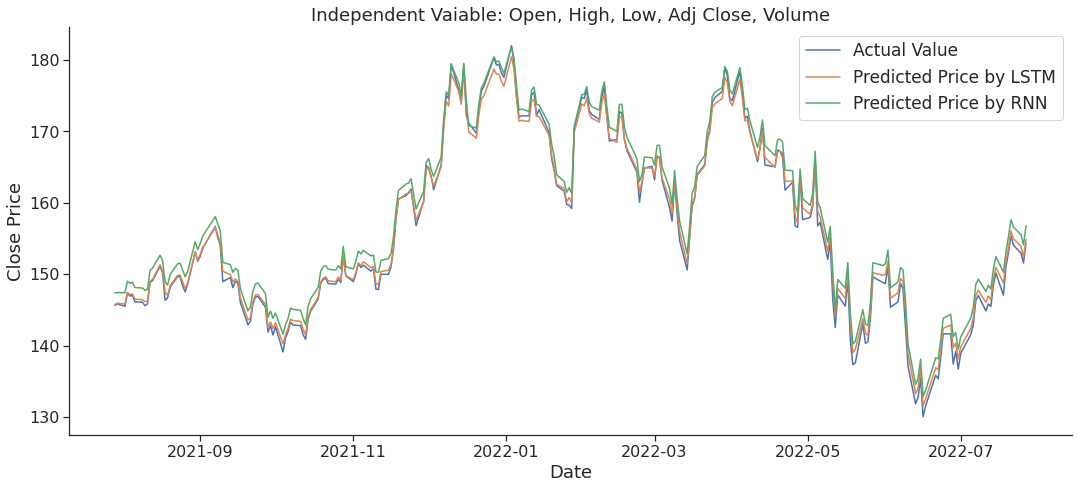

In [ ]:
train = new_df[:training_data_len]  # contains values from 0 to training_data_len
valid = new_df[training_data_len:]
valid['Predicted Price LSTM'] = pred
valid['Predicted Price RNN'] = pred_rnn
print(valid.head())
# adding custom params
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
import seaborn as sns

sns.set_theme(style="ticks", rc=custom_params)
fig, axes = plt.subplots(figsize=(16, 7))

# Visualise the data
plt.title('Independent Vaiable: Open, High, Low, Adj Close, Volume', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predicted Price LSTM', 'Predicted Price RNN']])  # giving the actual and predicted price
plt.legend(['Actual Value', 'Predicted Price by LSTM', 'Predicted Price by RNN'], loc='upper right', fontsize=17)
plt.show()

# Plotting the training loss and validation loss

Epoch 1/100
201/201 [==============================] - 4s 15ms/step - loss: 1326.9849 - val_loss: 306.4192
Epoch 2/100
201/201 [==============================] - 2s 12ms/step - loss: 54.6780 - val_loss: 12.8871
Epoch 3/100
201/201 [==============================] - 2s 12ms/step - loss: 10.1576 - val_loss: 6.5295
Epoch 4/100
201/201 [==============================] - 3s 17ms/step - loss: 3.9806 - val_loss: 5.8336
Epoch 5/100
201/201 [==============================] - 3s 17ms/step - loss: 4.3921 - val_loss: 3.5516
Epoch 6/100
201/201 [==============================] - 2s 12ms/step - loss: 5.2344 - val_loss: 10.0914
Epoch 7/100
201/201 [==============================] - 2s 12ms/step - loss: 4.9484 - val_loss: 3.2992
Epoch 8/100
201/201 [==============================] - 2s 12ms/step - loss: 9.5147 - val_loss: 4.2441
Epoch 9/100
201/201 [==============================] - 3s 17ms/step - loss: 6.3795 - val_loss: 2.6251
Epoch 10/100
201/201 [==============================] - 2s 12ms/step - lo

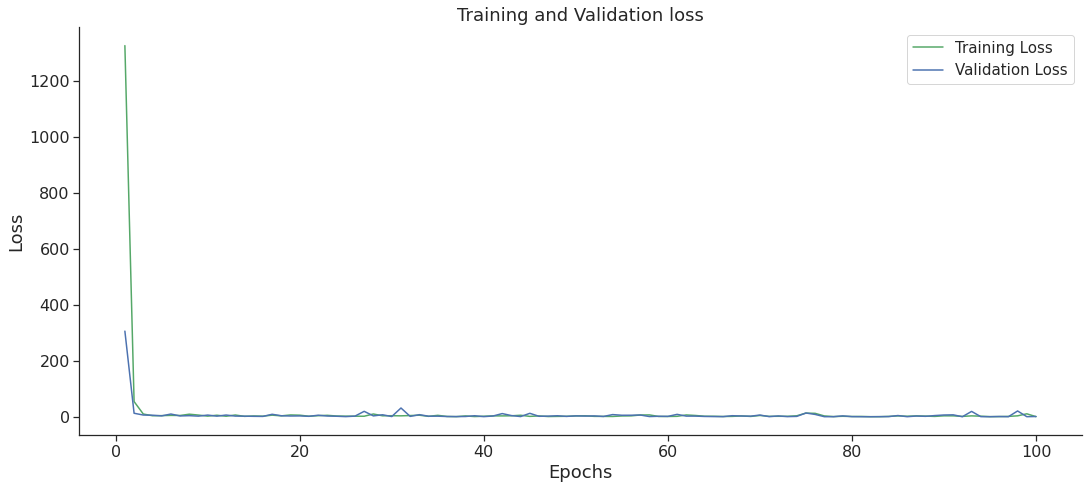

In [ ]:
X_train = x[0:training_data_len, :]
y_train = y[0:training_data_len, :]
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.80, random_state=1)
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_val, y_val))

# adding custom params
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
import seaborn as sns
sns.set_theme(style="ticks", rc=custom_params)
fig, axes = plt.subplots(figsize=(16, 7))

# print(history.history.keys())
# plotting the training and testing data loss
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, 101)
plt.plot(epochs, loss_train, 'g')
plt.plot(epochs, loss_val, 'b')
plt.title('Training and Validation loss', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right', fontsize=15)
plt.show()